In [7]:
import numpy as np
import netCDF4 as nc
import f90nml
import os
from salishsea_tools import bio_tools as bio
from salishsea_tools import viz_tools
import matplotlib.pyplot as plt
import cmocean
import matplotlib as mpl
%matplotlib inline

In [2]:
# load necessary files
resDir='/data/eolson/results/MEOPAR/SS36runs/CedarRuns/PAR_1_3/'
nampisprod=bio.load_nml_bio(resDir,'nampisprod')
fdia=nc.Dataset(os.path.join(resDir,'SalishSea_1h_20170531_20170719_prod_T_20170531-20170609.nc'))
fptc=nc.Dataset(os.path.join(resDir,'SalishSea_1h_20170531_20170719_ptrc_T_20170531-20170609.nc'))
m=nc.Dataset('/ocean/eolson/MEOPAR/NEMO-forcing/grid/mesh_mask201702_noLPE.nc')
tmask=m.variables['tmask'][:,:,:,:]
m.close()

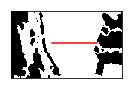

In [28]:

fig,ax=plt.subplots(1,1,figsize=(2,1.5))
ax.pcolormesh(tmask[0,0,:,:],cmap=cmocean.cm.gray)
ax.plot((250,311),(422,422),'r-')
ax.set_xlim(195,345)
ax.set_ylim(380,460)
jj=422
ii0=250
ii1=311
kk=20
ax.set_xticks(());
ax.set_yticks(());
viz_tools.set_aspect(ax)
fig.savefig('/home/eolson/pyCode/notebooks/figs/limitsMap.png',dpi=200,transparent=True)

In [12]:
# times 9, 19 are around noon local time
I=fdia.variables['PAR'][19,:,jj,ii0:ii1]
NO=fptc.variables['nitrate'][19,:,jj,ii0:ii1]
NH=fptc.variables['ammonium'][19,:,jj,ii0:ii1]
Si=fptc.variables['silicon'][19,:,jj,ii0:ii1]

In [13]:
D,M,N = bio.calc_p_limiters(I,NO,NH,Si,tmask[0,:,jj,ii0:ii1],nampisprod)

In [14]:
np.shape(fptc.variables['deptht']),np.shape(D['ILim'])

((40,), (40, 61))

In [15]:
[xx,zz]=np.meshgrid(fptc.variables['nav_lon'][jj,ii0:ii1],fptc.variables['deptht'][:kk])

In [16]:
np.shape(xx)

(20, 61)

In [17]:
cm1=cmocean.cm.ice

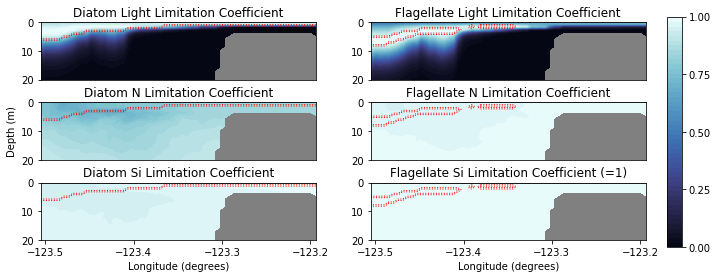

In [29]:
fig,ax=plt.subplots(3,2,figsize=(10,4))
fig.subplots_adjust(hspace=.4,wspace=.2,left=0.06,right=.9)

iax=ax[0,0]
iax.contourf(xx,zz,np.ma.masked_where(tmask[0,:kk,jj,ii0:ii1]==0,D['ILim'][:kk,:]),np.linspace(0,1,50),cmap=cm1)
iax.contour(xx,zz,np.ma.masked_where(tmask[0,:kk,jj,ii0:ii1]==0,D['limiter'][:kk,:]),(.5,1.5),colors='r',linestyles=':',linewidths=1)
iax.set_ylim(20,0)
iax.set_facecolor('gray')
iax.set_xticks(());
iax.set_title('Diatom Light Limitation Coefficient')
iax=ax[1,0]
iax.contourf(xx,zz,np.ma.masked_where(tmask[0,:kk,jj,ii0:ii1]==0,D['NLim'][:kk,:]),np.linspace(0,1,50),cmap=cm1)
iax.contour(xx,zz,np.ma.masked_where(tmask[0,:kk,jj,ii0:ii1]==0,D['limiter'][:kk,:]),(.5,1.5),colors='r',linestyles=':',linewidths=1)
iax.set_ylim(20,0)
iax.set_facecolor('gray')
iax.set_xticks(());
iax.set_title('Diatom N Limitation Coefficient')
iax.set_ylabel('Depth (m)')
iax=ax[2,0]
iax.contourf(xx,zz,np.ma.masked_where(tmask[0,:kk,jj,ii0:ii1]==0,D['SiLim'][:kk,:]),np.linspace(0,1,50),cmap=cm1)
iax.contour(xx,zz,np.ma.masked_where(tmask[0,:kk,jj,ii0:ii1]==0,D['limiter'][:kk,:]),(.5,1.5),colors='r',linestyles=':',linewidths=1)
iax.set_ylim(20,0)
iax.set_facecolor('gray')
iax.set_xticks((-123.5, -123.4,-123.3,-123.2));
iax.set_title('Diatom Si Limitation Coefficient')
iax.set_xlabel('Longitude (degrees)')


iax=ax[0,1]
iax.contourf(xx,zz,np.ma.masked_where(tmask[0,:kk,jj,ii0:ii1]==0,N['ILim'][:kk,:]),np.linspace(0,1,50),cmap=cm1)
iax.contour(xx,zz,np.ma.masked_where(tmask[0,:kk,jj,ii0:ii1]==0,N['limiter'][:kk,:]),(.5,1.5),colors='r',linestyles=':',linewidths=1)
iax.set_ylim(20,0)
iax.set_facecolor('gray')
iax.set_xticks(());
iax.set_title('Flagellate Light Limitation Coefficient')
iax=ax[1,1]
m=iax.contourf(xx,zz,np.ma.masked_where(tmask[0,:kk,jj,ii0:ii1]==0,N['NLim'][:kk,:]),np.linspace(0,1,50),cmap=cm1)
iax.contour(xx,zz,np.ma.masked_where(tmask[0,:kk,jj,ii0:ii1]==0,N['limiter'][:kk,:]),(.5,1.5),colors='r',linestyles=':',linewidths=1)
iax.set_ylim(20,0)
iax.set_facecolor('gray')
iax.set_xticks(());
iax.set_title('Flagellate N Limitation Coefficient')
iax=ax[2,1]
iax.contourf(xx,zz,np.ma.masked_where(tmask[0,:kk,jj,ii0:ii1]==0,N['SiLim'][:kk,:]),np.linspace(0,1,50),cmap=cm1)
iax.contour(xx,zz,np.ma.masked_where(tmask[0,:kk,jj,ii0:ii1]==0,N['limiter'][:kk,:]),(.5,1.5),colors='r',linestyles=':',linewidths=1)
iax.set_ylim(20,0)
iax.set_facecolor('gray')
iax.set_xticks((-123.5, -123.4,-123.3,-123.2));
iax.set_title('Flagellate Si Limitation Coefficient (=1)')
iax.set_xlabel('Longitude (degrees)')

cbax=fig.add_axes([.93,.1,.02,.8])
cb=fig.colorbar(m,cax=cbax,ticks=(0,.25,.5,.75,1))
fig.savefig('/home/eolson/pyCode/notebooks/figs/limits.png',dpi=200)

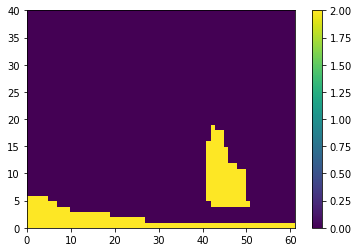

In [37]:
a=plt.pcolormesh(D['limiter'])
plt.colorbar(a)

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(15,3))
a=ax[0].pcolormesh(np.ma.masked_where(tmask[0,:,jj,ii0:ii1]==0,D['ILim']))
p=fig.colorbar(a,ax=ax[0])
a2=ax[1].pcolormesh(np.ma.masked_where(tmask[0,:,jj,ii0:ii1]==0,I))
p2=fig.colorbar(a2,ax=ax[1])

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(15,3))
a=ax[0].pcolormesh(np.ma.masked_where(tmask[0,:,jj,ii0:ii1]==0,D['SiLim']))
p=fig.colorbar(a,ax=ax[0])
a2=ax[1].pcolormesh(np.ma.masked_where(tmask[0,:,jj,ii0:ii1]==0,Si))
p2=fig.colorbar(a2,ax=ax[1])

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(15,3))
a=ax[0].pcolormesh(np.ma.masked_where(tmask[0,:,jj,ii0:ii1]==0,D['NLim']))
p=fig.colorbar(a,ax=ax[0])
a2=ax[1].pcolormesh(np.ma.masked_where(tmask[0,:,jj,ii0:ii1]==0,NO))
p2=fig.colorbar(a2,ax=ax[1])

In [ ]:
nampisprod

In [ ]:
def each_limiter(zz_I_par,zz_NO,zz_NH,zz_Si,
                 zz_rate_Iopt,zz_rate_gamma,zz_rate_K_Si,zz_rate_kapa,zz_rate_k):
    # Light
    zz_plank_growth_light = (1.0 - np.exp(-zz_I_par / (0.33 * zz_rate_Iopt)) ) * \
                           (np.exp(-zz_I_par / (30. * zz_rate_Iopt))) * 1.06
    zz_Uc = (1.0 - zz_rate_gamma) * zz_plank_growth_light
    ILim=zz_Uc
    # Si
    zz_Sc = np.where(zz_Si>0.0,zz_Si / (zz_rate_K_Si + zz_Si),0.0)
    SiLim=zz_Sc
    # Nitrate and Ammonium
    zz_Oup_cell = np.where(zz_NO > 0.0, 
                zz_NO * zz_rate_kapa / (zz_rate_k + zz_NO * zz_rate_kapa + zz_NH),0.0)
    zz_Hup_cell = np.where(zz_NH > 0.0, 
                zz_NH / (zz_rate_k + zz_NO * zz_rate_kapa + zz_NH),0.0)
    if (np.any(zz_Oup_cell < 0.)):
        raise ValueError('zz_Oup_cell<0')
    if (np.any(zz_Hup_cell < 0.)):
        raise ValueError('zz_Hup_cell<0')
    NLim=zz_Oup_cell+zz_Hup_cell
    # set flags
    limiter=-1*np.ones(zz_Si.shape)
    limiter=np.where(np.logical_and(ILim<=NLim,ILim<=SiLim),0,
                     np.where(NLim<=SiLim,1,np.where(SiLim<NLim,2,limiter)))

    return ILim, NLim, SiLim, limiter


In [ ]:
def calc_p_limiters(I,NO,NH,Si,nampisprod):
    ILimDiat, NLimDiat, SiLimDiat, limiterDiat=each_limiter(I,NO,NH,Si,nampisprod['zz_rate_Iopt_diat'],
                                        nampisprod['zz_rate_gamma_diat'],nampisprod['zz_rate_k_Si_diat'],
                                        nampisprod['zz_rate_kapa_diat'],nampisprod['zz_rate_k_diat'])
    
    ILimMyri, NLimMyri, SiLimMyri, limiterMyri=each_limiter(I,NO,NH,Si,nampisprod['zz_rate_Iopt_myri'],
                                        nampisprod['zz_rate_gamma_myri'],nampisprod['zz_rate_k_Si_myri'],
                                        nampisprod['zz_rate_kapa_myri'],nampisprod['zz_rate_k_myri'])
    
    ILimNano, NLimNano, SiLimNano, limiterNano=each_limiter(I,NO,NH,Si,nampisprod['zz_rate_Iopt_nano'],
                                        nampisprod['zz_rate_gamma_nano'],nampisprod['zz_rate_k_Si_nano'],
                                        nampisprod['zz_rate_kapa_nano'],nampisprod['zz_rate_k_nano'])
    Diat={'ILim':ILimDiat,'NLim':NLimDiat,'SiLim':SiLimDiat,'limiter':limiterDiat}
    Myri={'ILim':ILimMyri,'NLim':NLimMyri,'SiLim':SiLimMyri,'limiter':limiterMyri}
    Nano={'ILim':ILimNano,'NLim':NLimNano,'SiLim':SiLimNano,'limiter':limiterNano}
    return Diat, Myri, Nano

In [ ]:
ILim, NLim, SiLim, limiter = each_limiter(np.array((1000,1000,500,500,500,100,100,0.0,0.0)),
                                          np.array((   0,20.0, 15, 0.,122,16.,0.0,23.,30.)),
                                          np.array((   0,  0.,122,16.,0.0,23.,30.,20 ,20.)),
                                          np.array((  60, 0.0, 25, 40,2.2,3.3,0.0,60.,40.)),
                    nampisprod['zz_rate_Iopt_diat'],nampisprod['zz_rate_gamma_diat'],
                    nampisprod['zz_rate_k_Si_diat'],nampisprod['zz_rate_kapa_diat'],nampisprod['zz_rate_k_diat'])

In [ ]:
ILim, NLim, SiLim, limiter = each_limiter(np.array((1000,1000,500,500,500,100,100,0.0,0.0)),
                                          np.array((   0,20.0, 15, 0.,122,16.,0.0,23.,30.)),
                                          np.array((   0,  0.,122,16.,0.0,23.,30.,20 ,20.)),
                                          np.array((  60, 0.0, 25, 40,2.2,3.3,0.0,60.,40.)),
                    nampisprod['zz_rate_Iopt_myri'],nampisprod['zz_rate_gamma_myri'],
                    nampisprod['zz_rate_k_Si_myri'],nampisprod['zz_rate_kapa_myri'],nampisprod['zz_rate_k_myri'])

In [ ]:
zz_Si=np.array((  60, 0.0, 25, 40,2.2,3.3,0.0,60.,40.))
zz_Sc = np.where(zz_Si>0.0,zz_Si / (0 + zz_Si),0.0)

In [ ]:
print(nampisprod['zz_rate_Iopt_myri'],nampisprod['zz_rate_gamma_myri'],
                    nampisprod['zz_rate_k_Si_myri'],nampisprod['zz_rate_kapa_myri'],nampisprod['zz_rate_k_myri'])

In [ ]:
D,M,N = calc_p_limiters(np.array((1000,1000,500,500,500,100,100,0.0,0.0)),
                                np.array((   0,20.0, 15, 0.,122,16.,0.0,23.,30.)),
                                np.array((   0,  0.,122,16.,0.0,23.,30.,20 ,20.)),
                                np.array((  60, 0.0, 25, 40,2.2,3.3,0.0,60.,40.)),nampisprod)

In [ ]:
NLim

In [ ]:
SiLim

In [ ]:
limiter

In [ ]:
ILim=np.array(((np.nan,0.0,0.0,0.0),(0.5,0.5,0.5,0.5),(1.0,1.0,1.0,1.0)))

In [ ]:
NLim=np.array(((np.nan,0.0,0.5,1.0),(0.0,0.0,0.5,0.5),(0.0,0.5,0.2,0.0)))

In [ ]:
SiLim=np.array(((np.nan,0.0,1.0,0.5),(1.0,0.2,0.0,1.0),(0.5,0.0,0.3,0.0)))

In [ ]:
SiLim

In [ ]:
limiter=-1*np.ones(ILim.shape)
limiter

In [ ]:

limiter=np.where(np.logical_and(ILim<=NLim,ILim<=SiLim),0,np.where(NLim<=SiLim,1,np.where(SiLim<NLim,2,limiter)))

In [ ]:
print(ILim)
print(NLim)
print(SiLim)

In [ ]:
print(limiter)

In [ ]:
test={'a':1,'b':2}

In [ ]:
test

In [ ]:
test['a']